In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('../../data/train/cricket_dataset.csv')
df.head()

,total_runs,wickets,target,balls_left,won
0,0.0,0.0,125,119.0,1
1,0.0,0.0,125,118.0,1
2,1.0,0.0,125,117.0,1
3,1.0,1.0,125,116.0,1
4,1.0,1.0,125,115.0,1


In [61]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (15691, 5)

Missing values:
 total_runs    2
wickets       2
target        0
balls_left    2
won           0
dtype: int64


#### Removing rows with missing or NA values

In [62]:
# Remove rows with missing values
df = df.dropna()

## Perfoming EDA

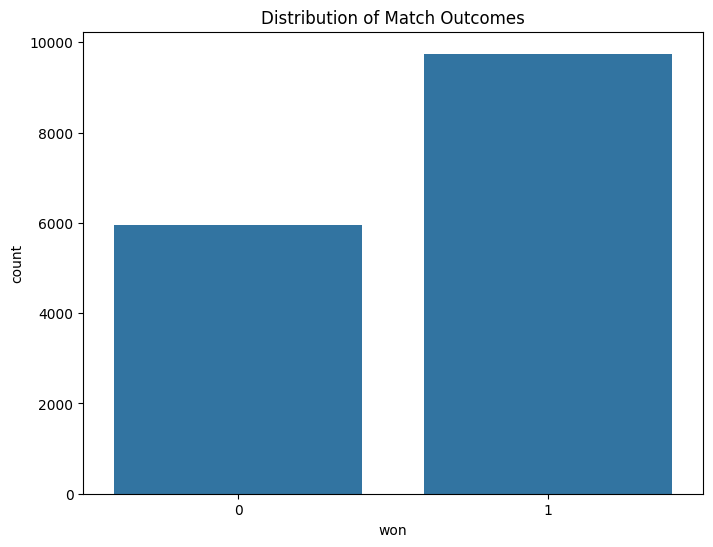

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='won')
plt.title('Distribution of Match Outcomes')
plt.show()

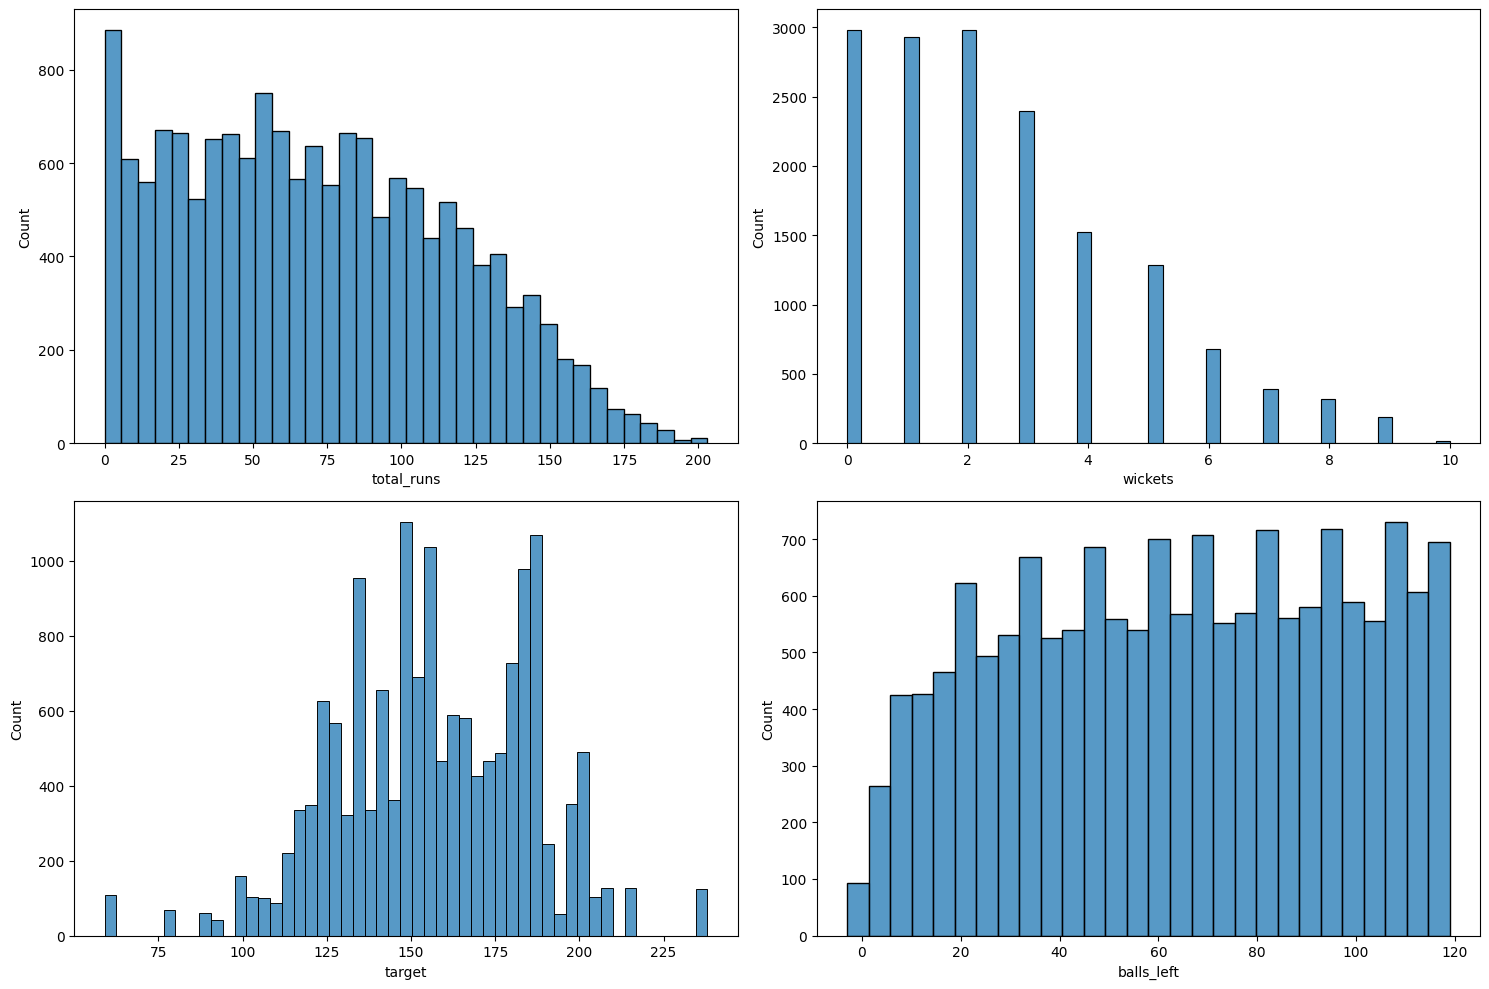

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='total_runs', ax=axes[0,0])
sns.histplot(data=df, x='wickets', ax=axes[0,1])
sns.histplot(data=df, x='target', ax=axes[1,0])
sns.histplot(data=df, x='balls_left', ax=axes[1,1])
plt.tight_layout()
plt.show()

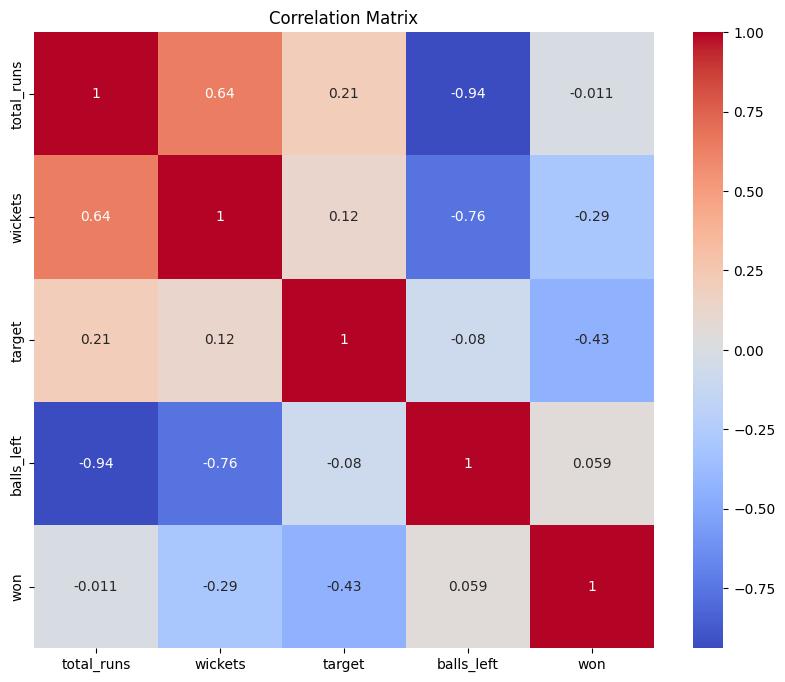

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

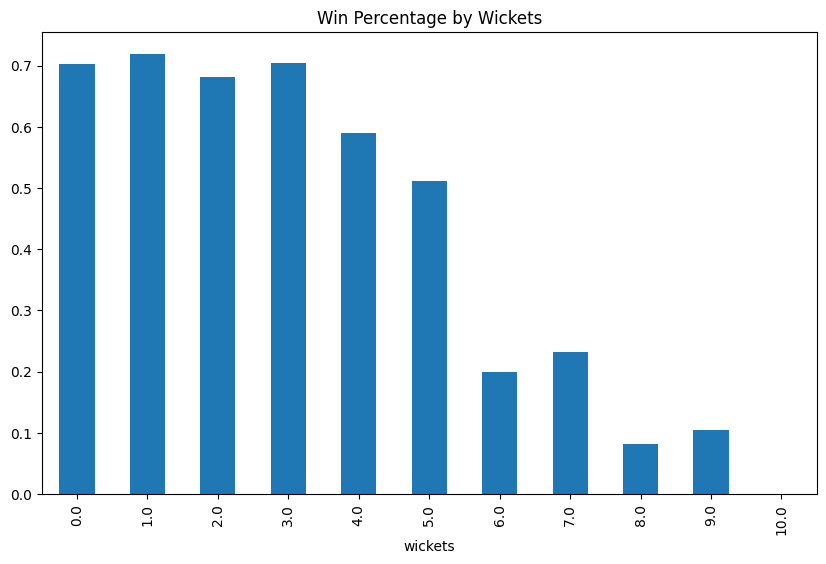

In [77]:
win_by_wickets = df.groupby('wickets')['won'].mean()
plt.figure(figsize=(10, 6))
win_by_wickets.plot(kind='bar')
plt.title('Win Percentage by Wickets')
plt.show()

#### Prepare the Data for Training

In [64]:
X = df[['total_runs', 'wickets', 'target', 'balls_left']]
y = df['won']

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training

In [66]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions

In [67]:
# Make predictions
y_pred = rf_model.predict(X_test)

### Evaluating Predictions

In [68]:
# Print model performance
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.964308476736775

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1231
           1       0.97      0.97      0.97      1907

    accuracy                           0.96      3138
   macro avg       0.96      0.96      0.96      3138
weighted avg       0.96      0.96      0.96      3138



In [ ]:
# Saving the model
model_filename = '../model/cricket_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)
print(f"Model saved as {model_filename}")

Model saved as ../model/cricket_prediction_model.pkl
